In [0]:
# All  import statements needed for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
#Load Data into environment - "fraud.csv"
from google.colab import files
uploaded = files.upload()


Saving fraud.csv to fraud.csv


In [7]:
#Read the data into a pandas dataframe 
#The data already has an index column at index = 0
fraud = pd.read_csv("fraud.csv", index_col = 0)

#show a few example rows from the dataset
fraud.iloc[:,20:].head()

,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
275376,-0.321073,0.010050,0.229987,0.031739,-0.051144,0.387186,-0.532949,-0.013739,-0.060630,9.95,0
30834,0.147439,0.395567,1.071935,-0.122266,0.445305,0.431845,-0.052348,0.036134,0.029695,29.95,0
7761,-0.090650,-0.200189,-0.155091,0.083476,0.555640,0.047534,0.888950,-0.059419,0.002949,6.00,0
248992,-0.187157,0.066627,0.254856,0.259946,0.567258,-0.319962,0.169769,-0.047853,-0.053770,29.95,0
220687,1.956947,1.217860,1.487775,1.252822,-0.074294,-0.553242,-0.181804,-0.047754,-0.167982,600.00,0


In [0]:
#Split the fraud dataset into training and testing sets
#the test set will be 30% of the dataset
X_train, X_test, y_train, y_test = train_test_split(fraud.iloc[:,:30], fraud["Class"], test_size=0.3, random_state=42)

In [10]:
#Showing the breakdown of the distribution of classes

print("Class Counts")
print(y_test.value_counts(), end="\n\n")
print("Class Proportions")
print(y_test.value_counts()/len(y_test))

Class Counts
0    1339
1     137
Name: Class, dtype: int64

Class Proportions
0    0.907182
1    0.092818
Name: Class, dtype: float64


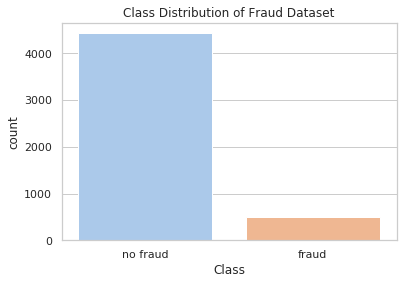

In [11]:
#set seaborn styling & color palette
sns.set(style="whitegrid")
sns.set_palette("pastel")

#Using a countplot to show the distribution of the classes: fraud and no-fraud
bp = sns.countplot(x=fraud["Class"])
plt.title("Class Distribution of Fraud Dataset")
bp.set_xticklabels(["no fraud","fraud"])
plt.show()

In [0]:
#Building Models

#Build the Logistic regression object
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
#use logistic model to fit training data
logisticRegr.fit(X_train, y_train)
#generate predicted classes for test data
logis_pred = logisticRegr.predict(X_test)
#generate predicted probabilites for test data
logis_pred_prob = logisticRegr.predict_proba(X_test)

#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-fraud')
dummy = DummyClassifier(strategy="most_frequent")
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)


In [13]:
#The logistic model predicted that ~7.5% of the data is fraud
print("Proportion of Transactions Predicted as Fraud (Logistic Regression) = ", logis_pred.mean())
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")

#The dummy model predicted that 0% of the data is fraud
print("Proportion of Transactions Predicted as Fraud (Dummy Classifer) = ", dumb_pred.mean())
print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Proportion of Transactions Predicted as Fraud (Logistic Regression) =  0.07655826558265583
Test accuracy (Logistic Regression) = 0.9769647696476965

Proportion of Transactions Predicted as Fraud (Dummy Classifer) =  0.0
Test accuracy (Dummy Classifier) = 0.9071815718157181


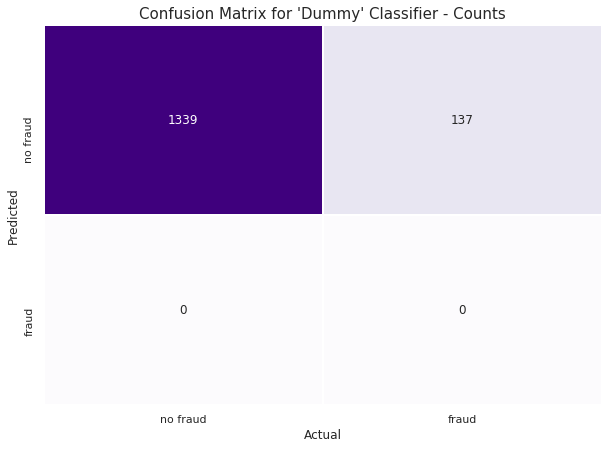

In [24]:
#Building Confusion matrix: Logistic - Thresh=0.5 - Counts

#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm_dummy_df.T, annot=True, cmap="Purples", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["no fraud","fraud"], yticklabels=["no fraud","fraud"])
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

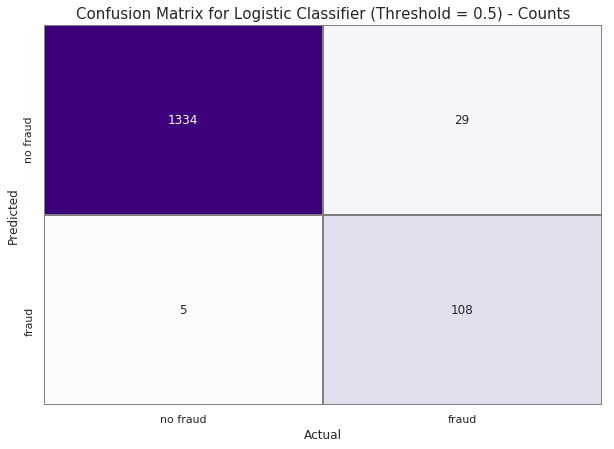

In [28]:
#Building Confusion matrix: Logistic - Thresh=0.5 - Counts

#generate confusion matrix
cm_logis = confusion_matrix(y_test, logis_pred)
#put it into a dataframe
cm_logis_df = pd.DataFrame(cm_logis)

#plot CM
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(pd.DataFrame(cm_logis_df.T), annot=True, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="grey", cbar=False,
           xticklabels=["no fraud","fraud"], yticklabels=["no fraud","fraud"])
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Confusion Matrix for Logistic Classifier (Threshold = 0.5) - Counts", fontsize=15)
plt.show()

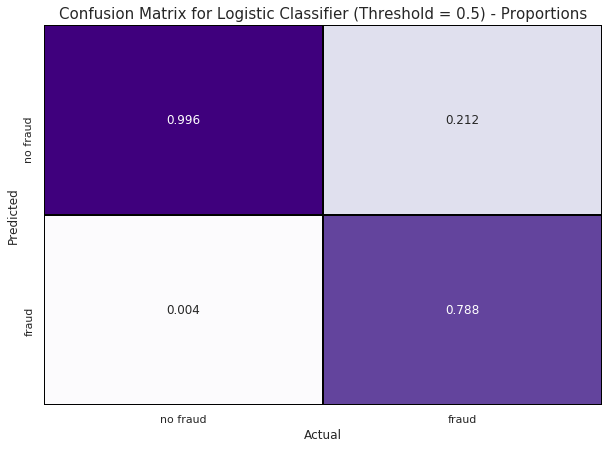

In [16]:
#Generating a Confusion matrix of proportions for logistic model

#converting counts to proportions
cm_logis = cm_logis.astype('float') / cm_logis.sum(axis=1)[:, np.newaxis]

cm_logis_df = pd.DataFrame(cm_logis)
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(pd.DataFrame(cm_logis_df.T), annot=True, cmap="Purples", vmin=0, vmax=1, fmt='.3f', linewidths=1, linecolor="black", cbar=False,
           xticklabels=["no fraud","fraud"], yticklabels=["no fraud","fraud"])
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Confusion Matrix for Logistic Classifier (Threshold = 0.5) - Proportions", fontsize=15)

plt.show()

In [20]:
#generating a report to extract the measure of interest using built-in sklearn function
report = classification_report(y_test,logis_pred,digits=3,output_dict = True)

print("LogReg Model:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

LogReg Model:
Accuracy = 0.977
Precision = 0.956
Specificity = 0.996
Sensitivity = 0.788
F1-score = 0.864


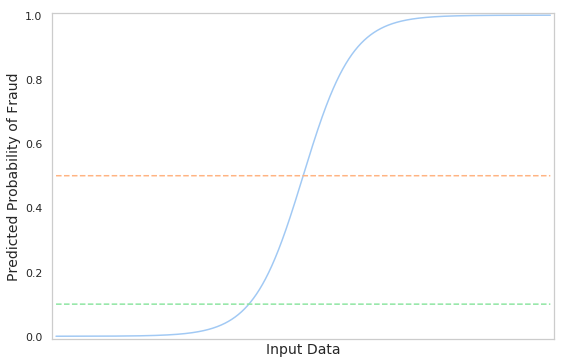

In [21]:
#helper functions
def sigmoid(z):
    sigma = 1 / (1 + np.exp(-z))
    return sigma

def threshold(z,threshold):
    thr = 0*z+threshold
    return thr

#create plot to show how class prediction changes depending on where threshold is set
x_val = np.linspace(-10, 10, 10000)

fig = plt.figure(figsize = (9,6))
plt.plot(x_val, sigmoid(x_val))
plt.plot(x_val, threshold(x_val,0.5), ls='--')
plt.plot(x_val, threshold(x_val,0.1), ls='--')
plt.ylabel('Predicted Probability of Fraud',size=14)
plt.xlabel('Input Data',size=14)
ax = plt.gca()
ax.grid(False)
ax.margins(0.008)
ax.get_xaxis().set_ticks([])
plt.show()

In [0]:
#creating new class predictions (from prediction probabilities) with a threshold of 0.1 
pred_logis_1 = (logis_pred_prob[:,1] >= 0.1).astype(int)

#generating another report, this time for threshold = 0.1
report = classification_report(y_test,pred_logis_1,digits=3,output_dict = True)

print("Threshold probability of 0.1:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

Threshold of 0.1:
Accuracy = 0.829
Precision = 0.338
Specificity = 0.823
Sensitivity = 0.883
F1-score = = 0.489


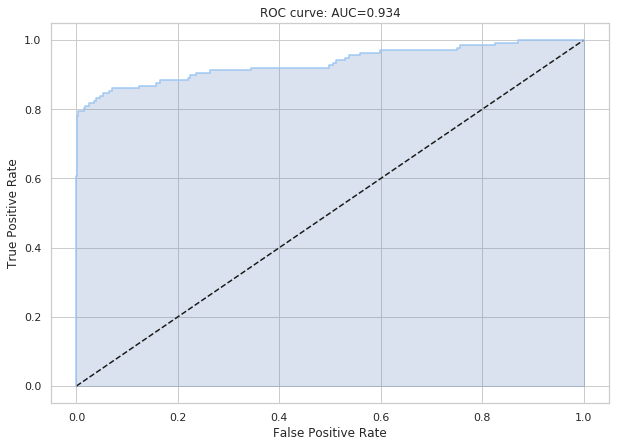

In [0]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, logis_pred_prob[:,1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y_test,logis_pred_prob[:,1])))
plt.show()


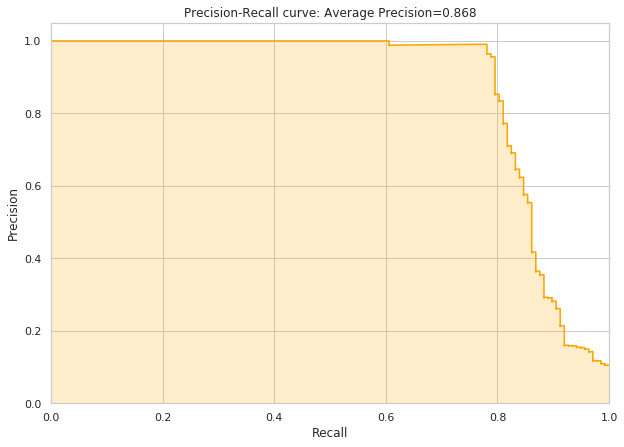

In [0]:
#Plot PR curve

#Generating points to plot on recall precision curve
precision, recall, thresholds = precision_recall_curve(y_test, logis_pred_prob[:,1])
average_precision = average_precision_score(y_test, logis_pred_prob[:,1])

#its a step function so plotting is different 
fig, ax = plt.subplots(figsize = (10,7))
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='orange', alpha=1,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='orange', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision={0:0.3f}'.format(average_precision))
plt.show()